Have you ever seen this plot?

In [1]:
from IPython.display import Image
Image(url='http://planetforlife.com/images/growinggap.jpg')

What this plot shows are historical discoveries of regular conventional oil (aka "oil fields") and production (aka "taking oil out of the oil field"). People who try to understand the world often think about this problem when they consider how much our current way of life is based on oil. 

Ever since I first saw a version of this plot in a talk ([this one](https://www.youtube.com/watch?v=sjRkU8eMW_4)), I've been wondering about this fascinating data. Since there is an oil field list page on Wikipedia, let's try to see if we can roughly replicate this curve.

# Oil fields on Wikipedia

The data for oil fields can be found here: [https://en.wikipedia.org/wiki/List_of_oil_fields](https://en.wikipedia.org/wiki/List_of_oil_fields). Let's download the data and parse it into a table. We can do this with a little bit of manual fiddling using `requests`, `beautifulsoup` and `pandas`.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_oil_fields')
tree = BeautifulSoup(r.text, 'html.parser')
table = tree.find('table', class_='wikitable')
df = pd.read_html(str(table), header=0)[0]

In [4]:
df.head()

Field        Location Discovered       Started production  \
0           Ghawar Field    Saudi Arabia    1948[3]                  1951[3]   
1           Burgan Field          Kuwait       1937                     1948   
2            Ahvaz Field            Iran       1958                      NaN   
3  Upper Zakum oil field  Abu Dhabi, UAE   1963[14]  1982[15][16] (1967[14])   
4        Gachsaran Field            Iran       1927                     1930   

                        Peaked  \
0         2005,[4] disputed[5]   
1                      2005[9]   
2                    1970s[11]   
3  Production still increasing   
4                         1974   

  Recoverable oil, past and future (billion barrels)  \
0                                          88-104[6]   
1                                           66-72[8]   
2                            65 (25 recoverable)[12]   
3                        50[15] (21 recoverable[14])   
4                                             66[18]   

  Production (million barrels/day)                   Rate of decline  
0                             5[7]                    8% per year[8]  
1                          1.7[10]     14% per year[citation needed]  
2                         .750[13]                               NaN  
3                        0.750[15]  Extension planned to 1 MMb/d[17]  
4                            0.480                               NaN

# Analysis 

Now that we have this list of oil fields, we can do some elementary plot by country and year discovered.

## By country 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
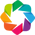

In [5]:
import holoviews as hv
hv.extension('bokeh')

In [6]:
%%opts Bars [width=600 tools=['hover'] xrotation=45] 
hv.Bars(df.groupby('Location').agg('count')['Field'])

:Bars   [Location]   (Field)

However, as you can see in the above plot, some labels are not adequate and repeat the countries several times. Let's clean this up by replacing each country with its nearest neighbor from a list of world countries.

In [7]:
import pycountry
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

def match_country(c):
    countries = list(country.name for country in pycountry.countries)
    full_name = [c in other.name or other.name in c for other in pycountry.countries]
    alpha3 = [c in other.alpha_3 or other.alpha_3 in c for other in pycountry.countries]
    alpha2 = [c in other.alpha_2 or other.alpha_2 in c for other in pycountry.countries]
    if any(full_name):
        return list(pycountry.countries)[full_name.index(True)].name
    elif any(alpha3):
        return list(pycountry.countries)[alpha3.index(True)].name
    elif any(alpha2):
        return list(pycountry.countries)[alpha2.index(True)].name
    else: 
        # difflib
        return max(((co, similar(c, co)) for co in countries), key=lambda item: item[1])[0]

In [8]:
df.Location = [match_country(c) for c in df.Location]

In [9]:
%%opts Bars [width=600 height=500 tools=['hover'] xrotation=45] 
hv.Bars(df.groupby('Location').agg('count')['Field'].sort_values())

:Bars   [Location]   (Field)

The above plot nicely shows the key players in the oil market: Russia and the Gulf states.

## By discovery year 

We also need to clean up the data of discovery year. We will do so using a regular expression.

In [10]:
df.Discovered = pd.to_numeric(df.Discovered.str.extract('(\d{4})', expand=False))

In [11]:
%%opts Bars [width=600 height=500 tools=['hover'] xrotation=45] 
hv.Bars(df.groupby('Discovered').agg('count')['Field'])

:Bars   [Discovered]   (Field)

Here the trend is not yet apparent. Let's regroup these by ten year bins.

In [12]:
import numpy as np

In [13]:
hist, bin_edges = np.histogram(df.Discovered.dropna().values, range=(1880, 2020), bins=14)

In [14]:
%%opts Bars [width=600 height=500 tools=['hover'] xrotation=45]
hv.Bars((bin_edges, hist), kdims='Decade discovered', vdims='number of oil fields')

:Bars   [Decade discovered]   (number of oil fields)

So it seems indeed that the amount of oil fields discovered has been on the decline for quite a long time.

# Analysis of the amount of oil

However, what really matters is the amount of oil discovered. Can we also do this? To achieve that, we need to extract the amount of oil from our table.

We first need to clean up the data a little bit.

In [15]:
df['Recoverable oil'] = pd.to_numeric(
    df['Recoverable oil, past and future (billion barrels)'].str.extract('(\d+(?:\.\d+)?)', expand=False))

Let's plot the data in billion barrels, first per country, then per decade discovered.

## By country 

In [16]:
%%opts Bars [width=600 height=500 tools=['hover'] xrotation=45] 
hv.Bars(df[['Location', 'Recoverable oil']].groupby('Location').agg('sum').sort_values(by='Recoverable oil'))

:Bars   [Location]   (Recoverable oil)

## By discovery year  

In [17]:
subdf = df[['Discovered', 'Recoverable oil']].dropna()
hist, bin_edges = np.histogram(subdf['Discovered'].values, 
                               range=(1880, 2020), bins=14, weights=subdf['Recoverable oil'])

In [18]:
%%opts Bars [width=600 height=500 tools=['hover'] xrotation=45]
hv.Bars((bin_edges, hist), kdims='Decade discovered', vdims='Billions of barrels')

:Bars   [Decade discovered]   (Billions of barrels)

Again, we see a sharp drop in discoveries since at least three decades. This could very possibly mean that the age of big oil field discoveries is over.

# Forecasting using the Hubbert curve 

Of course, we would like to have an idea for how long the production can adapt to the worldwide oil demand. To do that, we can use the Hubbert model (as in the famous [Hubbert curve](https://en.wikipedia.org/wiki/Hubbert_curve)) to fit the data we have gathered and give some predictions about world oil production.

First, let's take a look at the Hubbert model itself. 

## The Hubbert model 

The Hubbert model proposes a parametric form for the cumulative extracted oil as a function of time described by the following equation (primary reference for this is [here](http://sepwww.stanford.edu/sep/jon/hubbert.pdf)):

$$
Q(t) = \frac{Q_{\infty}}{1 + \exp(-\omega (t - \tau))}
$$

The parameter $Q_{\infty}$ gives the total quantity of oil you can extract from a well and $\tau$ defines the peak extraction time of the oil (as well as the point when you have extracted half of the existing capacity). $t$ is then the time (in years for our purposes). Finally, $\omega$ is a parameter that describes how fast or how slowly the oil is extracted.

Let's have a quick look at the cumulative production curve.

In [19]:
def hubbert_cumprod(qinf, omega, t, tau):
    """Hubbert cumulative production function."""
    return qinf / (1 + np.exp(-omega * (t - tau)))

In [20]:
tau = 5
t = np.linspace(-10, 30, num=200)
cumprod = hubbert_cumprod(1, 0.5, t, tau)

In [21]:
cumprod_plot = hv.Curve((t, cumprod), kdims='time', vdims='cumulative production').opts(width=300)
tau_plot = hv.VLine(tau, label='tau')

cumprod_plot * tau_plot

:Overlay
   .Curve.I   :Curve   [time]   (cumulative production)
   .VLine.Tau :VLine   [x,y]

The time derivative of the cumulative production is the *instantaneous* production, the production at a given moment in time. We can plot it alongside the previous graph.

In [22]:
def hubbert_prod(qinf, omega, t, tau):
    """Hubbert instantaneous production function."""
    return qinf * omega / (np.exp(-omega / 2. * (t - tau)) + np.exp(omega / 2. * (t - tau)))**2

In [23]:
prod = hubbert_prod(1, 0.5, t, tau)
prod_plot = hv.Curve((t, prod), kdims='time', vdims='instantaneous production').opts(width=300)

In [24]:
(cumprod_plot * tau_plot + prod_plot * tau_plot)

:Layout
   .Overlay.I  :Overlay
      .Curve.I   :Curve   [time]   (cumulative production)
      .VLine.Tau :VLine   [x,y]
   .Overlay.II :Overlay
      .Curve.I   :Curve   [time]   (instantaneous production)
      .VLine.Tau :VLine   [x,y]

## Fitting the model to our data 

Now of course, the question is: how do we use that model and our data that we have used in the above section together? I propose the following: we fit the time dynamics corresponding to the $\omega$ parameter using the average world data and then use this to do some forecasting. 

A simple strategy for this fit is to use the data on the peak production associated to the oil fields. Some of the fields give a starting data as well as a peak date. For instance the Ghawar Field in Saudi Arabia has the following data:

In [25]:
df.loc[0]

Field                                                         Ghawar Field
Location                                                      Saudi Arabia
Discovered                                                            1948
Started production                                                 1951[3]
Peaked                                                2005,[4] disputed[5]
Recoverable oil, past and future (billion barrels)               88-104[6]
Production (million barrels/day)                                      5[7]
Rate of decline                                             8% per year[8]
Recoverable oil                                                         88
Name: 0, dtype: object

The field started production in 1951, peaked in 2005 (even though this is disputed) and has a total recoverable oil quantity of at least 88 billion barrels. This means we can fit the production data using the current production of 5 million barrels per day. Since our units is billion barrels for the reserve, we will convert this production value to billion barrels per year:

In [26]:
5e6 * 365 * 1e-9

1.8250000000000002

We can then fit the $\omega$ value at time $t = \tau + n$ where $n$ is the number of years since the peak using this formula:

$$
P(t=\tau + n) = \frac {\omega Q_{\infty}} {(\exp(\omega n /2 ) + \exp(-\omega n /2 ))^2}
$$

Here $n$ is approximately 15 years and $Q_{\infty}$ 88 billion barrels.

In [27]:
from scipy.optimize import curve_fit

In [28]:
curve_fit(lambda n, omega: omega * 88 / (np.exp(omega * n / 2) + np.exp(- omega * n / 2))**2,
         xdata = [15.],
         ydata= [1.82],
         p0=0.1)

/Users/kappamaki/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([0.1028937]), array([[inf]]))

Let's see if the data we get is the one we expect:

In [29]:
tau = 2005
omega = 0.1028
Q = 88
t = np.linspace(1951, 2051, num=200)
cumprod = hubbert_cumprod(Q, omega, t, tau)
prod = hubbert_prod(Q, omega, t, tau)

In [30]:
cumprod_plot = hv.Curve((t, cumprod), kdims='time', vdims='cumulative production', label='model')
tau_plot = hv.VLine(tau, label='tau')
prod_plot = hv.Curve((t, prod), kdims='time', vdims='instantaneous production', label='model')

In [31]:
data_point = hv.Points((2019, 1.82), label='data point').options(size=10)

In [32]:
%%opts Curve [tools=['hover'] width=600] Overlay [legend_position='top_left']
prod_plot * tau_plot * data_point

:Overlay
   .Curve.Model       :Curve   [time]   (instantaneous production)
   .VLine.Tau         :VLine   [x,y]
   .Points.Data_point :Points   [x,y]

Of course, this fit is not very good. But I can't think of a better way than just this simple point estimate. 

We can move on and do this fit on the other oil fields that have the complete data: recoverable oil, peak year and current production. A little more of data munging is needed:

In [33]:
df['Peak'] = df['Peaked'].str.extract('(\d{4})', expand=False)

df['n'] = pd.datetime(2019, 1, 1) - pd.to_datetime(df['Peak'])

df['Production'] = df['Production (million barrels/day)'].str.extract('(\d*\.?\d*)', expand=False)

df.head()

Field                   Location  Discovered  \
0           Ghawar Field               Saudi Arabia      1948.0   
1           Burgan Field                     Kuwait      1937.0   
2            Ahvaz Field  Iran, Islamic Republic of      1958.0   
3  Upper Zakum oil field       United Arab Emirates      1963.0   
4        Gachsaran Field  Iran, Islamic Republic of      1927.0   

        Started production                       Peaked  \
0                  1951[3]         2005,[4] disputed[5]   
1                     1948                      2005[9]   
2                      NaN                    1970s[11]   
3  1982[15][16] (1967[14])  Production still increasing   
4                     1930                         1974   

  Recoverable oil, past and future (billion barrels)  \
0                                          88-104[6]   
1                                           66-72[8]   
2                            65 (25 recoverable)[12]   
3                        50[15] (21 recoverable[14])   
4                                             66[18]   

  Production (million barrels/day)                   Rate of decline  \
0                             5[7]                    8% per year[8]   
1                          1.7[10]     14% per year[citation needed]   
2                         .750[13]                               NaN   
3                        0.750[15]  Extension planned to 1 MMb/d[17]   
4                            0.480                               NaN   

   Recoverable oil  Peak          n Production  
0             88.0  2005  5113 days          5  
1             66.0  2005  5113 days        1.7  
2             65.0  1970 17897 days       .750  
3             50.0   NaN        NaT      0.750  
4             66.0  1974 16436 days      0.480

Let's drop the fields that don't have enough data:  

In [34]:
fit_data = df[['Field', 'Location', 'Discovered', 'Recoverable oil', 'Peak', 'n', 'Production']].dropna()
fit_data['Production'] = pd.to_numeric(fit_data['Production'])
fit_data = fit_data.reset_index(drop=True)
fit_data

Field                   Location  Discovered  Recoverable oil  \
0       Ghawar Field               Saudi Arabia      1948.0             88.0   
1       Burgan Field                     Kuwait      1937.0             66.0   
2        Ahvaz Field  Iran, Islamic Republic of      1958.0             65.0   
3    Gachsaran Field  Iran, Islamic Republic of      1927.0             66.0   
4    Cantarell Field                     Mexico      1976.0             35.0   
5       Tengiz Field                 Kazakhstan      1979.0             26.0   
6     Samotlor Field         Russian Federation      1965.0             14.0   
7        Prudhoe Bay              United States      1967.0             25.0   
8  Ekofisk oil field                     Norway      1969.0              3.3   

   Peak          n  Production  
0  2005  5113 days       5.000  
1  2005  5113 days       1.700  
2  1970 17897 days       0.750  
3  1974 16436 days       0.480  
4  2004  5479 days       0.340  
5  2010  3287 days       0.530  
6  1980 14245 days       0.844  
7  1988 11323 days       0.660  
8  2006  4748 days       0.127

Let's now loop over this table and fit the omega values.

In [35]:
from functools import partial

def fit_func(n, omega, Q):
    return omega * Q / (np.exp(omega * n / 2) + np.exp(- omega * n / 2))**2

omegas = []
model_production = []
for ind, series in fit_data.iterrows():
    Q = series['Recoverable oil']
    n = series.n.days / 365
    prod = series.Production
    fit = curve_fit(partial(fit_func, Q=Q),
         xdata = [n],
         ydata= [1.82],
        p0=0.1)
    omegas.append(fit[0][0])
    model_production.append(fit_func(n, omegas[-1], Q))
fit_data['omega'] = omegas
fit_data['model_production'] = model_production

/Users/kappamaki/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [36]:
fit_data[['Field', 'Production', 'model_production']]

Field  Production  model_production
0       Ghawar Field       5.000          1.406367
1       Burgan Field       1.700          1.054775
2        Ahvaz Field       0.750          0.296773
3    Gachsaran Field       0.480          0.328125
4    Cantarell Field       0.340          0.521986
5       Tengiz Field       0.530          0.646347
6     Samotlor Field       0.844          0.080308
7        Prudhoe Bay       0.660          0.180414
8  Ekofisk oil field       0.127          0.056793

If we compare the model predictions as well as the real values, we can see that the point-fit is not really a good method (in the sense that it doesn't fit the data really well).

But at least, we now have some values for the $\omega$ parameter. So we can turn to forecasting oil reserves as a function of time, using the average omega value.

## Forecasting using the Hubbert model 

Our final plot will be simple: using an average value for the omega parameter, we can plot the yearly oil production in billion of barrels as a function of time under the assumption that all oil fields follow the Hubbert model. 

In [37]:
mean_omega = fit_data.omega.mean()

In [38]:
subdf = df[['Field', 'Discovered', 'Peak', 'Recoverable oil']].copy()
subdf['Peak'] = pd.to_numeric(subdf['Peak'])
subdf['UntilPeak'] = (subdf['Peak'] - subdf['Discovered'])
subdf.UntilPeak = subdf.UntilPeak.fillna(value=subdf.UntilPeak.median())
subdf.loc[np.isnan(subdf.Peak), 'Peak'] = subdf[np.isnan(subdf.Peak)].Discovered + subdf[np.isnan(subdf.Peak)].UntilPeak

In [39]:
subdf.head()

Field  Discovered    Peak  Recoverable oil  UntilPeak
0           Ghawar Field      1948.0  2005.0             88.0       57.0
1           Burgan Field      1937.0  2005.0             66.0       68.0
2            Ahvaz Field      1958.0  1970.0             65.0       12.0
3  Upper Zakum oil field      1963.0  1987.0             50.0       24.0
4        Gachsaran Field      1927.0  1974.0             66.0       47.0

In [40]:
t = np.arange(1880, 2080)
total_production = np.zeros_like(t, dtype=np.float)
curves = []
for ind, series in subdf.dropna().iterrows():
    field_production = hubbert_prod(series['Recoverable oil'], mean_omega, t, series['Peak'])
    total_production += field_production
    curves.append(hv.Curve((t, field_production), label=series.Field, kdims='year', vdims='billion barrels'))

In [41]:
%%opts Curve [width=600 tools=['hover']]
hv.Overlay(curves)

:Overlay
   .Curve.Ghawar_Field                                                               :Curve   [year]   (billion barrels)
   .Curve.Burgan_Field                                                               :Curve   [year]   (billion barrels)
   .Curve.Ahvaz_Field                                                                :Curve   [year]   (billion barrels)
   .Curve.Upper_Zakum_oil_field                                                      :Curve   [year]   (billion barrels)
   .Curve.Gachsaran_Field                                                            :Curve   [year]   (billion barrels)
   .Curve.Cantarell_Field                                                            :Curve   [year]   (billion barrels)
   .Curve.Bolivar_Coastal_Field                                                      :Curve   [year]   (billion barrels)
   .Curve.Aghajari_Field                                                             :Curve   [year]   (billion barrels)
   .Curve.Lula_Field                                                                 :Curve   [year]   (billion barrels)
   .Curve.Safaniya_Oil_Field                                                         :Curve   [year]   (billion barrels)
   .Curve.Esfandiar_Field                                                            :Curve   [year]   (billion barrels)
   .Curve.Rumaila_Field                                                              :Curve   [year]   (billion barrels)
   .Curve.Tengiz_Field                                                               :Curve   [year]   (billion barrels)
   .Curve.Kirkuk_Field                                                               :Curve   [year]   (billion barrels)
   .Curve.Shaybah_Field                                                              :Curve   [year]   (billion barrels)
   .Curve.Agha_Jari_Field                                                            :Curve   [year]   (billion barrels)
   .Curve.Majnoon_Field                                                              :Curve   [year]   (billion barrels)
   .Curve.Samotlor_Field                                                             :Curve   [year]   (billion barrels)
   .Curve.Shaikan_Sheikh_Adi_Field                                                   :Curve   [year]   (billion barrels)
   .Curve.Romashkino_Field                                                           :Curve   [year]   (billion barrels)
   .Curve.Prudhoe_Bay                                                                :Curve   [year]   (billion barrels)
   .Curve.Sarir_Field                                                                :Curve   [year]   (billion barrels)
   .Curve.Priobskoye_field                                                           :Curve   [year]   (billion barrels)
   .Curve.Lyantorskoye_field                                                         :Curve   [year]   (billion barrels)
   .Curve.Abqaiq_Field                                                               :Curve   [year]   (billion barrels)
   .Curve.Chicontepec_Field                                                          :Curve   [year]   (billion barrels)
   .Curve.Berri_Field                                                                :Curve   [year]   (billion barrels)
   .Curve.West_Qurna_Field                                                           :Curve   [year]   (billion barrels)
   .Curve.Manifa_Field                                                               :Curve   [year]   (billion barrels)
   .Curve.Fyodorovskoye_Field                                                        :Curve   [year]   (billion barrels)
   .Curve.East_Baghdad_Field                                                         :Curve   [year]   (billion barrels)
   .Curve.Foroozan_hyphen_minus_Marjan_left_parenthesis_Iran_right_parenthesis_Field :Curve   [year]   (billion barrels)
   .Curve.Marlim_Field                                                               :Curve   [year]   (billion barrels

And finally, we can show the total production over the years computed using this data as well as the cumulative production.

In [42]:
%%opts Curve [tools=['hover']]
hv.Curve((t, total_production), kdims='year', vdims='billion barrels', label='yearly production').opts(width=300) + \
    hv.Curve((t, total_production.cumsum()), kdims='year', vdims='cumulated billion barrels', label='cumulative production').opts(width=300)

:Layout
   .Curve.Yearly_production     :Curve   [year]   (billion barrels)
   .Curve.Cumulative_production :Curve   [year]   (cumulated billion barrels)

Are these curves realistic? Well, probably not. In particular, they don't look like the data that I cited at the beginning of this article. Does that mean that the model we used to describe this situation is wrong? Yes, very probably (or our fit procedure, of course)! However, it is still usefull in the sense that it gives a numerical estimate of the world oil production from first principles as well as its dynamics.

# Conclusions 

I hope you had fun following along this data exploration. While the first parts were simply descriptive, we tried to apply some basic modeling to the publicly available data. I don't think the result is very good, but it nonetheless is an interesting approach to get to know some of basic data related to oil fields.

*This post was entirely written using the IPython notebook. Its content is BSD-licensed. You can see a static view or download this notebook with the help of nbviewer at [20190102_OilFieldsWikipedia.ipynb](http://nbviewer.ipython.org/urls/raw.github.com/flothesof/posts/master/20190102_OilFieldsWikipedia.ipynb).*